In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [264]:
df = pd.read_csv("/content/KM-13-2.csv")
df.head()

,GT,Model_1_0,Model_1_1,Model_2_0,Model_2_1
0,0,0.417549,0.582451,0.990821,0.009179
1,0,0.602454,0.397546,0.983883,0.016117
2,0,0.417549,0.582451,0.981113,0.018887
3,1,0.828717,0.171283,0.990038,0.009962
4,1,0.133871,0.866129,0.718471,0.281529


0    2500
1    2500
Name: GT, dtype: int64


<BarContainer object of 2 artists>

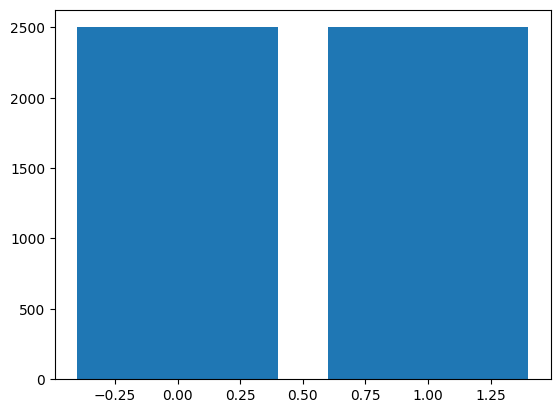

In [265]:
print(df['GT'].value_counts())

value_counts = df['GT'].value_counts()
plt.bar(value_counts.index, value_counts.values)

In [266]:
def get_preds(model, threshold):
    return np.array((df[model+"_1"] >= threshold).astype(int))

def accuracy(y_pred, y_true):
    return np.sum(y_true == y_pred) / np.shape(y_true)[0]

def calculate_errors(y_pred, y_true):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    return TP, TN, FP, FN

def precision(y_pred, y_true):
    TP, TN, FP, FN = calculate_errors(y_pred, y_true)
    if (TP + FP) == 0: return 0
    return TP / (TP + FP)

def recall(y_pred, y_true):
    TP, TN, FP, FN = calculate_errors(y_pred, y_true)
    if (TP + FN) == 0: return 0
    return TP / (TP + FN)

def f_score(y_pred, y_true):
    TP, TN, FP, FN = calculate_errors(y_pred, y_true)
    pr = precision(y_pred, y_true)
    rec = recall(y_pred, y_true)
    if pr == 0 or rec == 0: return 0
    return 2 / (1/pr + 1/rec)

def mcc(y_pred, y_true):
    TP, TN, FP, FN = calculate_errors(y_pred, y_true)
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    if denominator == 0:
        return 0

    mcc_value = numerator / denominator
    return mcc_value

def bal_acc(y_pred, y_true):
    TP, TN, FP, FN = calculate_errors(y_pred, y_true)

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    balanced_acc = (sensitivity + specificity) / 2

    return balanced_acc

def fpr(y_pred, y_true):
  TP, TN, FP, FN = calculate_errors(y_pred, y_true)

  return FP / (FP + TN)

metric_functions = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f_score': f_score,
    'mcc': mcc,
    'bal_acc': bal_acc,
    'fpr': fpr,
    # 'yjs': yjs,
    # 'auc_pr': auc_pr,
    # 'auc_roc': auc_roc
}

metrics_names = list(metric_functions.keys())
metrics = [metric_functions[metric_name] for metric_name in metrics_names]

results = []

for model in ['Model_1', 'Model_2']:
  model_eval = pd.DataFrame(columns=metrics_names)
  for threshold in np.arange(0, 1.01, 0.01):
    metrics_values = [threshold]
    for metric in metrics:

      metrics_values.append(metric(get_preds(model, threshold), y_true))

    metrics_values = pd.DataFrame([metrics_values], columns=['threshold']+metrics_names)

    model_eval = pd.concat([model_eval, pd.DataFrame(metrics_values)])

  results.append(model_eval.set_index('threshold'))
  print("\n" + model + ":")
  display(model_eval.set_index('threshold'))


Model_1:


,accuracy,precision,recall,f_score,mcc,bal_acc,fpr
threshold,,,,,,,
0.00,0.5000,0.500000,1.0000,0.666667,0,0.5000,1.0000
0.01,0.5000,0.500000,1.0000,0.666667,0,0.5000,1.0000
0.02,0.5000,0.500000,1.0000,0.666667,0,0.5000,1.0000
0.03,0.5000,0.500000,1.0000,0.666667,0,0.5000,1.0000
0.04,0.5000,0.500000,1.0000,0.666667,0,0.5000,1.0000
...,...,...,...,...,...,...,...
0.96,0.6200,0.987013,0.2432,0.390244,0.365112,0.6200,0.0032
0.97,0.6008,0.990272,0.2036,0.337757,0.331909,0.6008,0.0020
0.98,0.6008,0.990272,0.2036,0.337757,0.331909,0.6008,0.0020



Model_2:


,accuracy,precision,recall,f_score,mcc,bal_acc,fpr
threshold,,,,,,,
0.00,0.5000,0.500000,1.0000,0.666667,0,0.5000,1.0000
0.01,0.6178,0.573460,0.9196,0.706407,0.295502,0.6178,0.6840
0.02,0.6684,0.627653,0.8280,0.714039,0.355391,0.6684,0.4912
0.03,0.6830,0.653472,0.7792,0.710819,0.372968,0.6830,0.4132
0.04,0.6850,0.665356,0.7444,0.702662,0.372639,0.6850,0.3744
...,...,...,...,...,...,...,...
0.96,0.6438,0.894621,0.3260,0.477866,0.37253,0.6438,0.0384
0.97,0.6430,0.903044,0.3204,0.472985,0.374339,0.6430,0.0344
0.98,0.6416,0.907834,0.3152,0.467933,0.373846,0.6416,0.0320


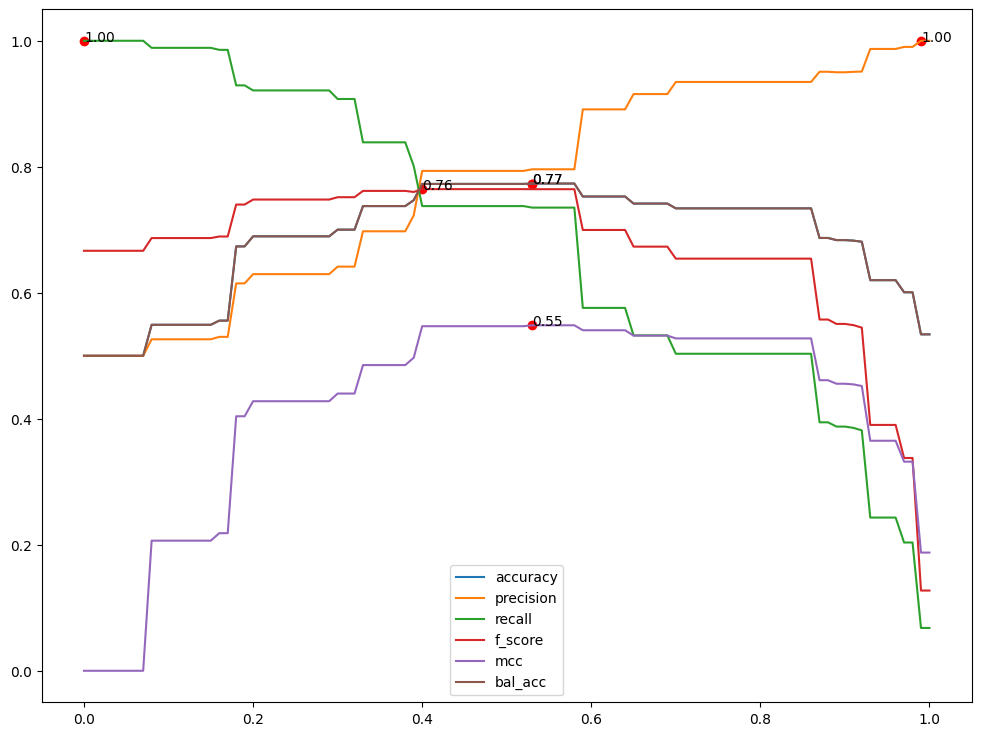

In [267]:
model1 = results[0]
model1 = model1.drop(['fpr'], axis=1)
plt.figure(figsize=(12, 9))

for column in model1.columns:
    plt.plot(model1.index, results[0][column], label=column)

for column in model1.columns:
    max_val = model1[column].max()
    max_index = model1[model1[column] == max_val].index[0]
    plt.scatter(max_index, max_val, color='red', marker='o')
    plt.text(max_index, max_val, f'{max_val:.2f}')

plt.legend()
plt.show()

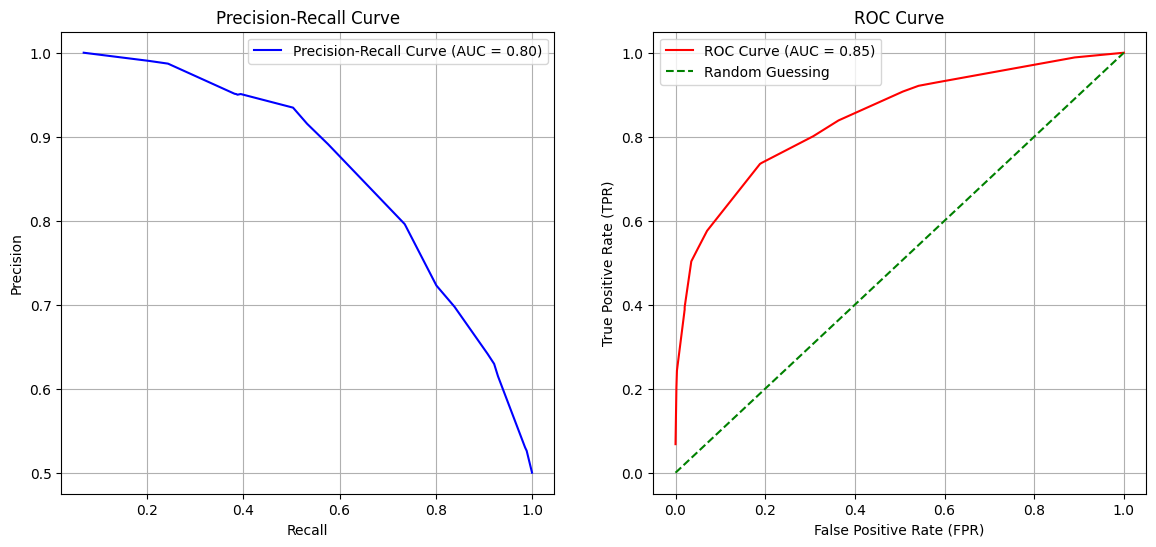

In [284]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

auc_pr = auc(results[0]['recall'], results[0]['precision'])
ax1.plot(results[0]['recall'], results[0]['precision'], label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})', color='blue')

ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve')
ax1.legend()
ax1.grid(True)

FPR = results[0]['fpr']
TPR = results[0]['recall']
roc_auc = auc(FPR, TPR)
ax2.plot(FPR, TPR, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')

ax2.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing', color='green')

ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_title('ROC Curve')
ax2.legend()
ax2.grid(True)

# Adjust layout
#plt.tight_layout()

plt.show()

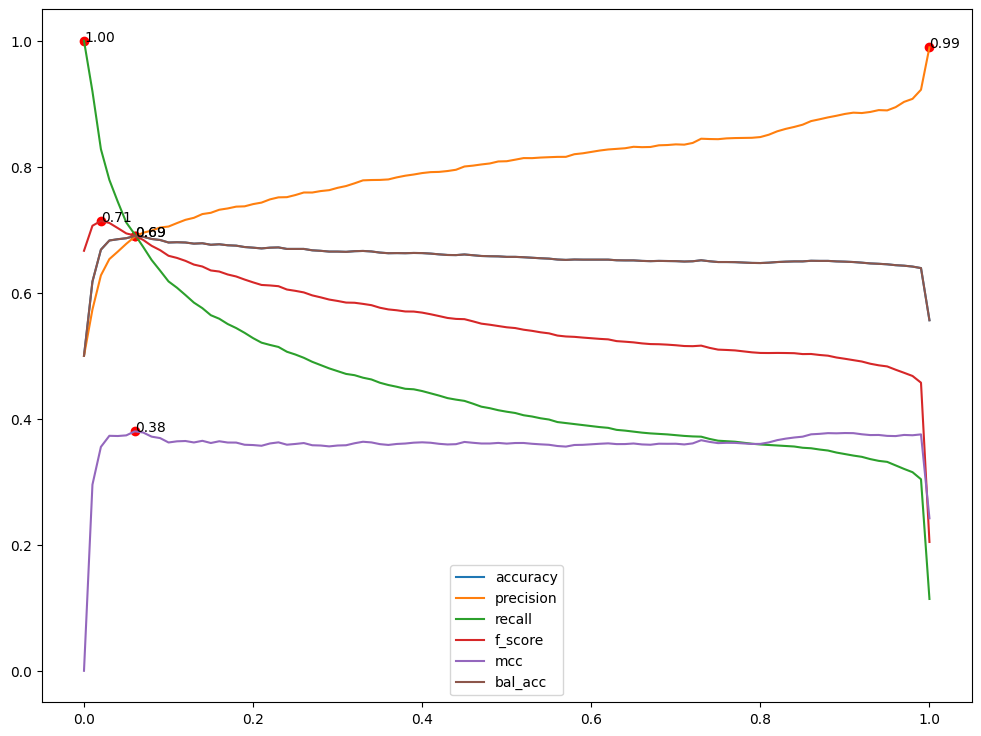

In [268]:
model2 = results[1]
model2 = model2.drop(['fpr'], axis=1)
plt.figure(figsize=(12, 9))

for column in model2.columns:
    plt.plot(model2.index, results[1][column], label=column)

for column in model2.columns:
    max_val = model2[column].max()
    max_index = model2[model2[column] == max_val].index[0]
    plt.scatter(max_index, max_val, color='red', marker='o')
    plt.text(max_index, max_val, f'{max_val:.2f}')

plt.legend()
plt.show()

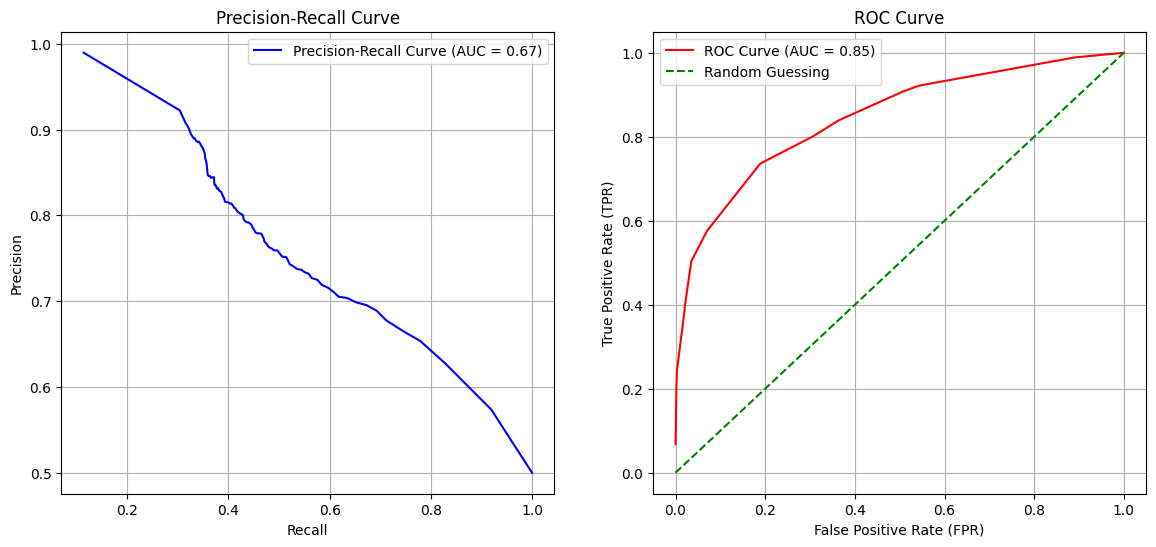

In [285]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

auc_pr = auc(results[1]['recall'], results[1]['precision'])
ax1.plot(results[1]['recall'], results[1]['precision'], label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})', color='blue')

ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve')
ax1.legend()
ax1.grid(True)

FPR = results[0]['fpr']
TPR = results[0]['recall']
roc_auc = auc(FPR, TPR)
ax2.plot(FPR, TPR, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')

ax2.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing', color='green')

ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_title('ROC Curve')
ax2.legend()
ax2.grid(True)

# Adjust layout
#plt.tight_layout()

plt.show()